In [2]:
import numpy as np
img_size = 128 #px
label_dict = {"Cat":0, "Dog":1}
x_data = []
y_data = []

In [3]:
import tensorflow as tf

In [4]:
label_dict["Cat"]

0

#### Preparing data
grayscale, same dimensions, create labels, randomize data

In [5]:
import glob
from PIL import Image
for pet in ["Cat", "Dog"]:
    pet_files = glob.glob("C:/Users/ians-pc/Downloads/kagglecatsanddogs_3367a/PetImages/" + pet + "/*.jpg")
#     print(pet_files)
    for index, img_path in enumerate(pet_files):
        try:
            image = Image.open(img_path)
            image = image.resize((img_size, img_size)) # resize
            image = image.convert('L') # convert to grayscale
            
            #     print(image.format)
            #     print(image.mode)
            #     print(image.size)
            # show the image
            image = np.array(image)
            x_data.append(image)
            y_data.append(label_dict[pet])
            if index % 2000 == 0: print(index)
        except:
            print("error:", img_path)

0
2000
4000
6000
8000
error: C:/Users/ians-pc/Downloads/kagglecatsanddogs_3367a/PetImages/Cat\666.jpg
10000
12000
0
error: C:/Users/ians-pc/Downloads/kagglecatsanddogs_3367a/PetImages/Dog\11702.jpg
2000
4000
6000
8000
10000


C:\Users\ians-pc\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\ians-pc\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\ians-pc\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\ians-pc\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\ians-pc\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expe

12000


In [6]:
import keras
from sklearn.model_selection import train_test_split
np_x_data = np.array(x_data)
np_y_data = np.array(y_data)

X_train, X_test, y_train, y_test = train_test_split(np_x_data, np_y_data, test_size=0.125, random_state=42)
train_size = X_train.shape[0]
test_size = X_test.shape[0]

X_train = X_train.reshape(train_size, img_size, img_size, 1)
X_test = X_test.reshape(test_size, img_size, img_size, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# convert class vectors to binary class matrices
# (converts numeric values to one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=None)
y_test = keras.utils.to_categorical(y_test, num_classes=None)
print(y_train[0])

(21873, 128, 128, 1)
(3125, 128, 128, 1)
(21873,)
(3125,)
[0. 1.]


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (21873, 128, 128, 1)
21873 train samples
3125 test samples


#### Create Model
conv layer, pooling, flattening

In [8]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [9]:
# MODEL 1
num_classes=2
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) #flatten = turning volume into 1d vector
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# MODEL 2 (WITH DROPOUT)
num_classes=2
model2 = Sequential()
model2.add(Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Dropout(0.2))
model2.add(Flatten()) #flatten = turning volume into 1d vector
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# MODEL 3 (DROPOUT, SINGLE OUTPUT)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))
model.add(Flatten()) #flatten = turning volume into 1d vector
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#### Train Model
make sure to have the right model in [model].fit

In [ ]:
batch_size = 128
epochs = 50

# make sure this is right model
hist = model2.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

print("The model has successfully trained")

Epoch 1/50
171/171 [==============================] - 195s 1s/step - loss: 0.7310 - accuracy: 0.5255 - val_loss: 0.6897 - val_accuracy: 0.5818
Epoch 2/50
171/171 [==============================] - 186s 1s/step - loss: 0.6864 - accuracy: 0.5441 - val_loss: 0.6864 - val_accuracy: 0.5846
Epoch 3/50
171/171 [==============================] - 196s 1s/step - loss: 0.6811 - accuracy: 0.5634 - val_loss: 0.6837 - val_accuracy: 0.5587
Epoch 4/50
171/171 [==============================] - 191s 1s/step - loss: 0.6789 - accuracy: 0.5657 - val_loss: 0.6836 - val_accuracy: 0.5632
Epoch 5/50
171/171 [==============================] - 199s 1s/step - loss: 0.6754 - accuracy: 0.5739 - val_loss: 0.6793 - val_accuracy: 0.5789
Epoch 6/50
171/171 [==============================] - 213s 1s/step - loss: 0.6742 - accuracy: 0.5788 - val_loss: 0.6798 - val_accuracy: 0.5661
Epoch 7/50
171/171 [==============================] - 198s 1s/step - loss: 0.6707 - accuracy: 0.5881 - val_loss: 0.6766 - val_accuracy: 0.5939

In [29]:
model2.save('dogcat3.h5') # MAKE SURE THIS IS RIGHT TOO
print("Saving the model as dogcat.h5")

Saving the model as dogcat.h5


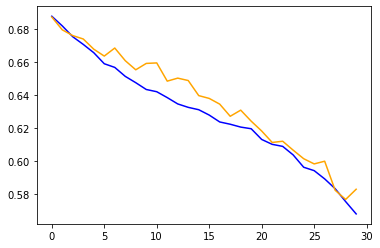

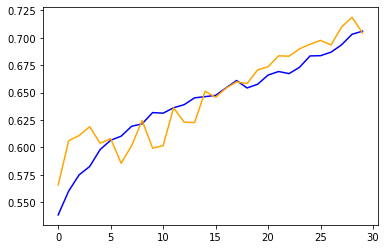

In [19]:
import matplotlib.pyplot as plt
# plot loss
# pyplot.title('Cross Entropy Loss')
plt.figure(0)
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')
# plot accuracy
# pyplot.title('Classification Accuracy')
plt.figure(1)
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')

#### Testing Kaan's cat

In [2]:
import keras, glob
from PIL import Image
model = keras.models.load_model("dogcat1.h5")
for kitty in glob.glob("C:/Users/ians-pc/Desktop/testing/*.png"):
    image = Image.open(kitty)
    image = image.resize((img_size, img_size)) # resize
    image = image.convert('L') # convert to grayscale
    image.show()

    #     print(image.format)
    #     print(image.mode)
    #     print(image.size)
    # show the image
    image = np.array(image)
    image.resize(1, img_size, img_size, 1)
    image.astype('float32')
    image = np.divide(image, 255)
    print(model.predict(image)[0])

[0.96020454 0.03979544]
[0.8096979  0.19030215]
[0.9694918  0.03050819]
[0.50069714 0.4993028 ]
[0.497124 0.502876]
[0.8837196  0.11628029]
[0.36685756 0.6331424 ]
[0.40583336 0.5941667 ]


In [30]:
import keras, glob
from PIL import Image
model3 = keras.models.load_model("./dogcat3.h5")
for kitty in glob.glob("C:/Users/ians-pc/Desktop/testing/*.png"):
    image = Image.open(kitty)
    image = image.resize((img_size, img_size)) # resize
    image = image.convert('L') # convert to grayscale
    #image.show()

    #     print(image.format)
    #     print(image.mode)
    #     print(image.size)
    # show the image
    image = np.array(image)
    image.resize(1, img_size, img_size, 1)
    image.astype('float32')
    image = np.divide(image, 255)
    print(model3.predict(image)[0])

[0.49394077 0.50605917]
[0.49938098 0.50061905]
[0.48883644 0.51116353]
[0.49804634 0.5019537 ]
[0.4968457  0.50315434]
[0.49322486 0.50677514]
[0.4921303 0.5078697]
[0.4867422  0.51325786]
